In [14]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"C:\Users\UJJWAL KUMAR\Downloads\Bank_Data - Bank_Data.csv")
df.head()

,AGE,HOME,INCOME,GENDER,HOUSEHOLD_N,CREDIT_LINES_N,DEAFULTED
0,23,R,2,M,3,2,1
1,43,R,3,F,2,2,1
2,63,R,7,M,3,3,0
3,46,H,7,F,4,4,0
4,55,H,7,F,3,4,0


In [4]:
print(df.corr())

                     AGE    INCOME  HOUSEHOLD_N  CREDIT_LINES_N  DEAFULTED
AGE             1.000000  0.168421    -0.011221        0.043436  -0.084937
INCOME          0.168421  1.000000     0.504249        0.365290  -0.383171
HOUSEHOLD_N    -0.011221  0.504249     1.000000        0.613363  -0.040478
CREDIT_LINES_N  0.043436  0.365290     0.613363        1.000000   0.159312
DEAFULTED      -0.084937 -0.383171    -0.040478        0.159312   1.000000


In [5]:
df.isna().sum()

AGE               0
HOME              0
INCOME            0
GENDER            0
HOUSEHOLD_N       0
CREDIT_LINES_N    0
DEAFULTED         0
dtype: int64

In [6]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
df['HOME']= lab_enc.fit_transform(df['HOME'])
df['GENDER']=lab_enc.fit_transform(df['GENDER'])


In [7]:
df[["HOME","GENDER"]].head()

,HOME,GENDER
0,1,1
1,1,0
2,1,1
3,0,0
4,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   AGE             1100 non-null   int64
 1   HOME            1100 non-null   int32
 2   INCOME          1100 non-null   int64
 3   GENDER          1100 non-null   int32
 4   HOUSEHOLD_N     1100 non-null   int64
 5   CREDIT_LINES_N  1100 non-null   int64
 6   DEAFULTED       1100 non-null   int64
dtypes: int32(2), int64(5)
memory usage: 51.7 KB


In [9]:
df.describe()

,AGE,HOME,INCOME,GENDER,HOUSEHOLD_N,CREDIT_LINES_N,DEAFULTED
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,50.397273,0.331818,4.434545,0.411818,3.137273,2.452727,0.406364
std,13.246229,0.471080,1.465492,0.492386,1.205942,1.785734,0.491377
min,3.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000
25%,43.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000
50%,52.000000,0.000000,4.000000,0.000000,3.000000,2.000000,0.000000
75%,62.000000,1.000000,5.000000,1.000000,4.000000,4.000000,1.000000
max,78.000000,1.000000,7.000000,1.000000,6.000000,6.000000,1.000000


In [10]:
x=df.iloc[:,0:6].values
y=df.iloc[:,-1].values

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=4)


Text(0.5, 1.0, 'KNN_AlGO')

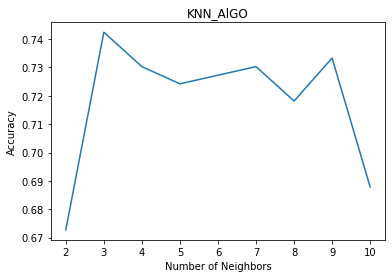

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
li=[]
n=[]
for i in range(2,11):
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    ac = accuracy_score(y_test,y_pred)
    li.append(ac)
    n.append(i)
plt.plot(n,li)
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN_AlGO")
    


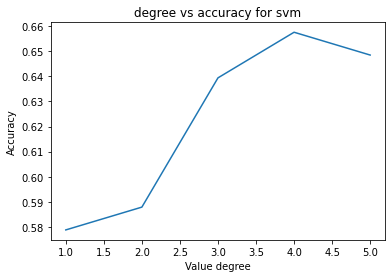

In [20]:
d=[]
sc=[]
from sklearn.svm import SVC
for i in range(1,6):
    model=SVC(kernel='poly',degree=i,random_state=0)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    #cm=confusion_matrix(Y_pred,Y_test)
    score=accuracy_score(y_pred,y_test)
    d.append(i)
    sc.append(score)
plt.plot(d,sc)
plt.xlabel("Value degree")
plt.ylabel("Accuracy")
plt.title("degree vs accuracy for svm")
plt.show()

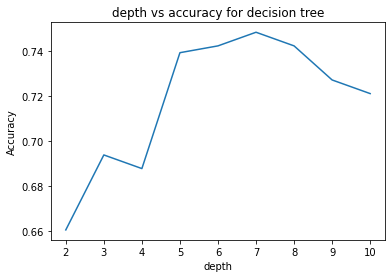

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dep=[]
sc=[]
for i in range(2,11):
    model=DecisionTreeClassifier(max_depth=i)
    model.fit(x_train,y_train)
    Y_pred=model.predict(x_test)
    score=accuracy_score(Y_pred,y_test)
    dep.append(i)
    sc.append(score)
    
plt.plot(dep,sc)
plt.xlabel("depth")
plt.ylabel("Accuracy")
plt.title("depth vs accuracy for decision tree")
plt.show()    


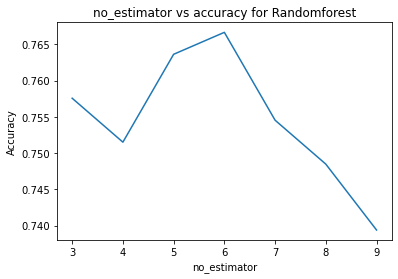

In [22]:
from sklearn.ensemble import RandomForestClassifier as r


n=[]
scr=[]
for i in range(3,10):
    model=r(n_estimators=i,random_state=2)
    model.fit(x_train,y_train)
    Y_pred=model.predict(x_test)
    score=accuracy_score(Y_pred,y_test)
    n.append(i)
    scr.append(score)
plt.plot(n,scr)
plt.xlabel("no_estimator")
plt.ylabel("Accuracy")
plt.title("no_estimator vs accuracy for Randomforest")
plt.show() 